In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import string
import numpy as np
import random
from collections import Counter

In [2]:
import nltk
nltk.download('punkt')
#from nltk.tokenize import sent_tokenize
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /home/joseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
try:
    total_df = pd.read_pickle('total_df.p')
except:
    df_1 = pd.read_csv('articles1.csv')
    df_2 = pd.read_csv('articles2.csv')
    df_3 = pd.read_csv('articles3.csv')
    #print(df_1.head(1))
    print(df_1.shape)

    #print(df_1.publication.unique())
    #print(df_2.publication.unique())
    #print(df_3.publication.unique())
    #merge dataframes
    total_df = pd.concat([df_1, df_2, df_3])
    df_1 = 0
    df_2 = 0
    df_3 = 0
    total_df['sentence_count'] = 0
    total_df['word_count'] = 0
    total_df.to_pickle('total_df.p')
publication_names = total_df.publication.unique()

In [ ]:
total_df.publication.value_counts().plot(kind='bar')

In [ ]:
#print(list(total_df))
#print(total_df.loc[total_df['publication'] == 'New York Times']['title'])

In [4]:
ny_times_list = total_df.loc[total_df['publication'] == 'New York Times']['content'].tolist()
breit_list = total_df.loc[total_df['publication'] == 'Breitbart']['content'].tolist()
wapo_list = total_df.loc[total_df['publication'] == 'Washington Post']['content'].tolist()

In [5]:
nyt_list = [i for i in ny_times_list if random.random() > 1-3000/len(ny_times_list)]
breit_list = [i for i in breit_list if random.random() > 1-3000/len(breit_list)]
wapo_list = [i for i in wapo_list if random.random() > 1-3000/len(wapo_list)]
print(len(nyt_list), len(breit_list), len(wapo_list))

3051 2937 2960


In [6]:
def prepare_text(publication_content_list):
    #lower case text
    lower_case = [text.strip().lower() for text in publication_content_list]
    #replace strange quote characters with normal ones 
    replace_quotes = [text.replace('“', '"').replace('”', '"') for text in lower_case]
    #do punkt sentence tokenization
    sentence_tokenize = [sent_detector.tokenize(text.strip()) for text in replace_quotes]
    #do nltk word tokenization
    word_tokenize = [nltk.word_tokenize(text) for text in replace_quotes]
    #get unique string counts
    string_counts = [Counter(text) for text in word_tokenize]
    return sentence_tokenize, word_tokenize, string_counts

In [7]:
nyt_sent, nyt_word, nyt_string_count = prepare_text(nyt_list)

In [8]:
breit_sent, breit_word, breit_string_count = prepare_text(breit_list)

In [9]:
wapo_sent, wapo_word, wapo_string_count = prepare_text(wapo_list)

In [99]:
pickle.dump( [['nyt', nyt_sent, nyt_word, nyt_string_count], 
 ['breit', breit_sent, breit_word, breit_string_count],
 ['wapo', wapo_sent, wapo_word, wapo_string_count]], open( "tokenized_strings.p", "wb" ) )

MemoryError: 

# word count

In [10]:
nyt_wc = [len(text) for text in nyt_word]
breit_wc = [len(text) for text in breit_word]
wapo_wc = [len(text) for text in wapo_word]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1.62544170e-04, 1.62544170e-04, 3.53356890e-05, 4.24028269e-05,
        1.41342756e-04, 3.95759717e-04, 2.61484099e-04, 2.54416961e-04,
        1.97879859e-04, 3.53356890e-04, 4.80565371e-04, 6.28975265e-04,
        6.71378092e-04, 7.06713781e-04, 5.65371025e-04, 7.27915194e-04,
        5.01766784e-04, 7.13780919e-04, 1.13780919e-03, 1.41342756e-03,
        1.19434629e-03, 9.39929329e-04, 6.71378092e-04, 6.00706714e-04,
        5.08833922e-04, 5.15901060e-04, 4.73498233e-04, 5.65371025e-04,
        4.59363958e-04, 3.32155477e-04, 4.59363958e-04, 3.25088339e-04,
        3.81625442e-04, 4.66431095e-04, 3.60424028e-04, 3.25088339e-04,
        2.19081272e-04, 2.19081272e-04, 1.83745583e-04, 2.82685512e-04,
        1.90812721e-04, 1.41342756e-04, 1.41342756e-04, 8.48056537e-05,
        9.18727915e-05, 1.06007067e-04, 9.18727915e-05, 7.06713781e-05,
        4.24028269e-05]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750

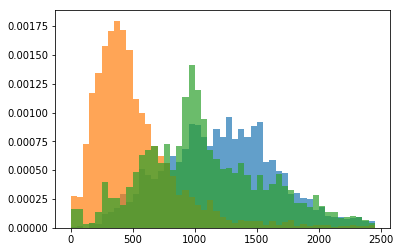

In [11]:
plt.hist(nyt_wc, bins = list(range(0,2500,50)),   normed = True, alpha = 0.7)
plt.hist(breit_wc, bins = list(range(0,2500,50)), normed = True, alpha = 0.7)
plt.hist(wapo_wc, bins = list(range(0,2500,50)),  normed = True, alpha = 0.7)

# Sentence Count

In [12]:
nyt_sent_count = [len(text) for text in nyt_sent]
breit_sent_count = [len(text) for text in breit_sent]
wapo_sent_count = [len(text) for text in wapo_sent]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.06122449e-03, 2.58503401e-03, 5.71428571e-03, 7.14285714e-03,
        1.39455782e-02, 1.40136054e-02, 1.66666667e-02, 1.85714286e-02,
        2.12925170e-02, 1.62585034e-02, 1.40816327e-02, 1.28571429e-02,
        1.00680272e-02, 8.36734694e-03, 5.98639456e-03, 6.66666667e-03,
        3.67346939e-03, 3.26530612e-03, 1.97278912e-03, 2.24489796e-03,
        2.38095238e-03, 1.22448980e-03, 1.08843537e-03, 8.84353741e-04,
        6.80272109e-04, 8.16326531e-04, 5.44217687e-04, 6.12244898e-04,
        4.76190476e-04, 4.76190476e-04, 2.04081633e-04, 2.72108844e-04,
        2.04081633e-04, 1.36054422e-04, 2.04081633e-04, 6.80272109e-05,
        1.36054422e-04, 6.80272109e-05, 2.04081633e-04, 6.80272109e-05,
        6.80272109e-05, 2.04081633e-04, 2.04081633e-04, 0.00000000e+00,
        2.04081633e-04, 6.80272109e-05, 0.00000000e+00, 0.00000000e+00,
        6.80272109e-05]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,

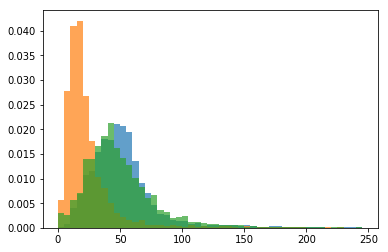

In [13]:
plt.hist(nyt_sent_count,   bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.hist(breit_sent_count, bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.hist(wapo_sent_count,  bins = list(range(0,250,5)), normed = True, alpha = 0.7)

# Sentence Length

In [14]:
nyt_sent_len = [i/j for i,j in zip(nyt_wc, nyt_sent_count)]
breit_sent_len = [i/j for i,j in zip(breit_wc, breit_sent_count)]
wapo_sent_len = [i/j for i,j in zip(wapo_wc, wapo_sent_count)]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00067636, 0.        , 0.        , 0.00033818, 0.00033818,
        0.00067636, 0.00270544, 0.00371999, 0.00338181, 0.00676361,
        0.01285086, 0.0209672 , 0.02942171, 0.03347988, 0.0453162 ,
        0.06898884, 0.0696652 , 0.09266148, 0.09739601, 0.09299966,
        0.0801488 , 0.07609063, 0.05951978, 0.05275617, 0.03889077,
        0.03449442, 0.02570172, 0.01758539, 0.00608725, 0.00777815,
        0.00676361, 0.00473453, 0.0016909 , 0.00202908, 0.00067636,
        0.00067636, 0.00033818, 0.00067636, 0.00067636, 0.00033818,
        0.        , 0.        , 0.        , 0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

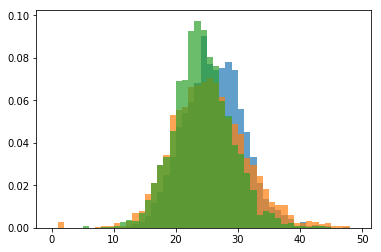

In [15]:
plt.hist(nyt_sent_len,   bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.hist(breit_sent_len, bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.hist(wapo_sent_len,  bins = list(range(0,50,1)), normed = True, alpha = 0.7)

# Unique Word Count and Fraction

In [19]:
translator = str.maketrans('', '', string.punctuation + '”“')
print(string.punctuation)
punctuation_set = set(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{'_', '-', ':', '^', '%', '}', '(', '+', ';', '<', '/', '?', '$', '[', '*', '"', ']', "'", '!', '\\', '~', '`', '@', '|', '&', '=', '#', ')', '.', ',', '>', '{'}


In [23]:
nyt_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in nyt_word]
#nyt_unique_wc_old = [len(set(text.lower().translate(translator).split())) for text in nyt_list]
#print(nyt_unique_wc[:10], nyt_unique_wc_old[:10])
breit_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in breit_word]
wapo_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in wapo_word]


#breit_unique_wc = [len(set(text.lower().translate(translator).split())) for text in breit_list]
#wapo_unique_wc = [len(set(text.lower().translate(translator).split())) for text in wapo_list]

In [24]:
nyt_unique_word_frac = [float(i/j) for i,j in zip(nyt_unique_wc, nyt_wc)]
breit_unique_word_frac = [float(i/j) for i,j in zip(breit_unique_wc, breit_wc)]
wapo_unique_word_frac = [float(i/j) for i,j in zip(wapo_unique_wc, wapo_wc)]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0338295 , 0.0338295 , 0.        , 0.067659  , 0.0338295 ,
        0.0338295 , 0.        , 0.0338295 , 0.1014885 , 0.067659  ,
        0.1014885 , 0.        , 0.202977  , 0.1014885 , 0.        ,
        0.33829499, 0.30446549, 0.37212449, 0.77807848, 0.57510149,
        1.18403248, 1.86062246, 2.94316644, 2.87550744, 4.53315291,
        5.85250338, 6.29228687, 7.07036536, 5.98782138, 7.20568336,
        6.79972936, 6.52909337, 6.22462788, 5.0067659 , 4.8037889 ,
        4.9391069 , 3.61975643, 2.26657645, 1.65764547, 1.55615697,
        1.21786198, 0.67658999, 0.54127199, 0.77807848, 0.27063599,
        0.54127199, 0.33829499, 0.202977  , 0.33829499, 0.33829499,
        0.2368065 , 0.2368065 , 0.135318  , 0.1014885 , 0.067659  ,
        0.0338295 , 0.1014885 , 0.        , 0.        , 0.067659  ,
        0.067659  , 0.067659  , 0.067659  , 0.06

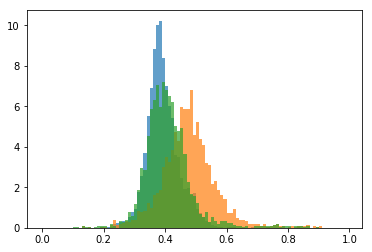

In [25]:
plt.hist(nyt_unique_word_frac,   bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha=0.7)
plt.hist(breit_unique_word_frac, bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)
plt.hist(wapo_unique_word_frac,  bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)

# Mean word length

In [41]:
nyt_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in nyt_word]
breit_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in breit_word]
wapo_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in wapo_word]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00675676, 0.        , 0.        , 0.02027027,
        0.        , 0.04054054, 0.05405405, 0.06756757, 0.08783784,
        0.16216216, 0.15540541, 0.28378378, 0.35135135, 0.43918919,
        0.69594595, 0.69594595, 0.9527027 , 1.06756757, 1.43918919,
        1.31756757, 1.58783784, 1.71621622, 1.52027027, 1.38513514,
        1.40540541, 1.17567568, 0.88513514, 0.68918919, 0.60135135,
        0.31081081, 0.30405405, 0.18243243, 0.11486486, 0.06081081,
        0.0472973 , 0.00675676, 0.03378378, 0.01351351, 0.02027027,
        0.02702703, 0.02027027, 0.01351351, 0.        , 0.01351351,
        0.        , 0.01351351, 0.        , 0.        , 0.        ,
        0.00675676, 0.        , 0.        , 0.        , 0.00675676,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

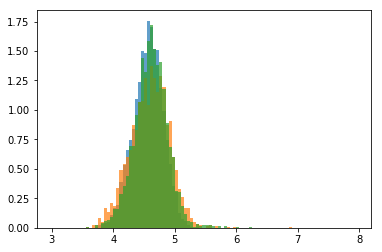

In [42]:
plt.hist(nyt_word_len,   bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha=0.7)
plt.hist(breit_word_len, bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha = 0.7)
plt.hist(wapo_word_len,  bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha = 0.7)

# Sentence length distribution

In [28]:
nyt_sent_len_std = [np.std([len(sent) for sent in text]) for text in nyt_sent]
breit_sent_len_std = [np.std([len(sent) for sent in text]) for text in breit_sent]
wapo_sent_len_std = [np.std([len(sent) for sent in text]) for text in wapo_sent]

In [37]:
print([len(sent) for sent in nyt_sent[0]],nyt_sent_len_std[:10])

[201, 190, 94, 223, 83, 272, 215, 59, 90, 83, 115, 200, 114, 142, 141, 48, 179, 105, 131, 53, 126, 126, 329, 34, 84, 20, 194, 200, 297, 228, 32, 109, 174, 83, 217, 111, 18, 128, 117, 204, 89, 253, 117, 53, 162, 321, 20, 100, 77, 50, 239, 105, 130, 282, 253, 86, 262, 169, 185, 78, 65, 112, 30, 90, 244, 287, 41, 81, 86, 142, 127, 197, 153, 81, 94, 87, 161, 161, 86, 61, 66, 82, 142, 53, 141, 75, 86, 245, 232, 317, 124, 129, 25, 140, 133, 52, 76, 346, 60, 107, 152, 105, 318, 162, 242, 65, 70, 41, 184, 192, 112, 94, 155, 278, 78, 187, 181, 197, 134, 208, 232, 335, 71, 177, 262, 123, 94, 134, 192, 194, 131, 166, 129, 169, 119, 43, 251, 235, 172, 196, 74, 57, 30, 47, 141, 203, 273, 203, 104, 67, 121, 80, 155, 71, 85, 142, 112, 217, 99, 93, 163, 213, 64, 115, 97, 34, 121, 70, 119, 66, 244, 75, 60, 132, 22, 70, 84, 159, 77, 57, 85, 23, 86, 80, 54, 127, 48, 63, 75, 112, 86, 47, 71, 60, 168, 52, 58, 52, 129, 106, 177, 166, 75, 60, 193, 193, 107, 128, 190, 64, 36, 37] [73.44184736191093, 74.225257

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00185936, 0.        , 0.00016903, 0.00016903, 0.00016903,
        0.00033807, 0.        , 0.        , 0.        , 0.00016903,
        0.        , 0.        , 0.00033807, 0.        , 0.00016903,
        0.00016903, 0.00033807, 0.00033807, 0.0010142 , 0.0010142 ,
        0.00219743, 0.00236646, 0.00473293, 0.00524003, 0.00524003,
        0.01183232, 0.01014199, 0.01386072, 0.01588911, 0.01724138,
        0.02822853, 0.0250169 , 0.02738337, 0.03042596, 0.0280595 ,
        0.02721433, 0.02620014, 0.0275524 , 0.02467884, 0.0240027 ,
        0.02298851, 0.01757945, 0.01301555, 0.01166329, 0.01132522,
        0.00794456, 0.00845166, 0.00760649, 0.00574713, 0.00507099,
        0.0030426 , 0.00422583, 0.00338066, 0.00236646, 0.0020284 ,
        0.00118323, 0.00084517, 0.00118323, 0.00067613, 0.00033807,
        0.0005071 , 0.00067613, 0.00067613, 0.00033807, 0.00016903,
        0.00033807, 0.00033807, 0.        , 0.00033807, 0.00016903,
        0.00016903, 0.        , 0.00016903, 0.00

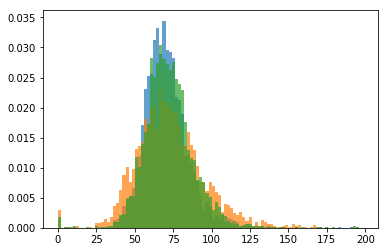

In [33]:
plt.hist(nyt_sent_len_std,   bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha=0.7)
plt.hist(breit_sent_len_std, bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha = 0.7)
plt.hist(wapo_sent_len_std,  bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha = 0.7)

In [43]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [47]:
#join data
wc = nyt_wc + breit_wc + wapo_wc
sent_len = nyt_sent_len + breit_sent_len + wapo_sent_len
sent_len_std = nyt_sent_len_std + breit_sent_len_std + wapo_sent_len_std
unique_word_frac = nyt_unique_word_frac + breit_unique_word_frac + wapo_unique_word_frac
word_len = nyt_word_len + breit_word_len + wapo_word_len
#print(len(wc), len(word_length))

In [90]:
#combine features
X = [[i, j,k,l,m] for i, j,k,l,m in zip( wc, sent_len, sent_len_std, unique_word_frac, word_len)]

In [91]:
#labels
Y = [0 for i in range(len(nyt_wc))] + [1 for i in range(len(breit_wc))]# + [2 for i in range(len(wapo_wc))]
print(len(Y))

5988


In [92]:
#test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:len(Y)], Y, test_size=0.33, random_state=42)

In [93]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [94]:
y_pred = clf.predict(X_test)

In [95]:
conf_mat = np.zeros((3,3))
for pred, true in zip(y_pred, y_test):
    conf_mat[pred,true] += 1./len(y_pred)

[[0.40263025 0.12190187 0.        ]
 [0.1198786  0.35558928 0.        ]
 [0.         0.         0.        ]] 0.9999999999999927


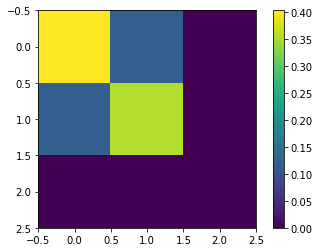

In [96]:
plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))

In [57]:
total_df = 0

In [59]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file='graph') 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

In [ ]:
print(wapo_collect[0])

In [ ]:
#get content column into list
article_list = total_df['content'].tolist()
print(article_list[:10])

In [ ]:
word_count_list = [len(text.split()) for text in article_list[:10000]]
print(word_count_list[:100])

In [ ]:
translator = str.maketrans('', '', string.punctuation)
unique_word_list = [set(text.lower().translate(translator).split()) for text in article_list[:10000]]
print(unique_word_list[:1])
#df.loc[row, column] = pd.DataFrame({'fake_key': list})

ADD WORDCOUNT COLUMN

In [ ]:
def word_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'word_count'] = total_df.loc[total_df['publication'] == pub_name, 'content'].str.split().str.len()
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

In [ ]:
word_count('Washington Post')
word_count('New York Times')
word_count('Vox')
word_count('Fox News')
#print(total_df.loc[total_df['publication'] == 'Washington Post']['word_count'].head(20))
#wapo_group['word_count'] = wapo_group['content'].str.split().str.len()
#print(wapo_group['word_count'].head(20))

In [ ]:
print(total_df.groupby('publication')['word_count'].describe())

ADD SENTENCE LENGTH COLUMN

In [ ]:
def sentence_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'sentence_count'] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(sent_detector.tokenize(row.strip())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
sentence_count('Washington Post')
sentence_count('New York Times')
sentence_count('Vox')
sentence_count('Fox News')
#sentence_count('')

In [ ]:
print(total_df.groupby('publication')['sentence_count'].describe())
#print(total_df.head(2))

In [ ]:
#plot word count vs sentence length
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','word_count'], total_df.loc[total_df['publication'] == 'New York Times','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','word_count'], total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','word_count'], total_df.loc[total_df['publication'] == 'Vox','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','word_count'], total_df.loc[total_df['publication'] == 'Fox News','sentence_count'])

plt.xlim((0,5000))

plt.ylim((0,200))
plt.show()

In [ ]:
#total_df['unique_word_count'] = 0

In [ ]:
def unique_word_count(pub_name):
    col_name = 'unique_word_count'
    total_df.loc[total_df['publication'] == pub_name, col_name] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(set(row.lower().split())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
#unique_word_count('New York Times')
#unique_word_count('Vox')
#unique_word_count('Washington Post')
unique_word_count('Fox News')
print(total_df.groupby('publication')['unique_word_count'].describe())

In [ ]:
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','sentence_count'], total_df.loc[total_df['publication'] == 'New York Times','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'], total_df.loc[total_df['publication'] == 'Washington Post','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','sentence_count'], total_df.loc[total_df['publication'] == 'Vox','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','sentence_count'], total_df.loc[total_df['publication'] == 'Fox News','unique_word_count'], s=4)

plt.xlim((0,200))

plt.ylim((0,1000))
plt.show()

In [ ]:
#sub_df_max_wordcount = sub_df
total_df.groupby('publication')['word_count'].hist(bins = 100, alpha = 0.5, normed = True)